In [46]:
import pandas as pd 
import matplotlib.image as img
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans, vq


### Extract RGB values from image

In [47]:
# Read batman image and print dimensions
batman_image = img.imread('../datasets/batman.jpg')
print(batman_image.shape)

r = []; g = []; b = []
# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)


(169, 269, 3)


In [48]:
batman_df = pd.DataFrame({'red':r,'green':g,'blue':b})
batman_df.head()

,red,green,blue
0,37,27,25
1,33,22,20
2,48,30,28
3,47,31,31
4,30,24,26


In [49]:
# Scale wage and value
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_green'] = whiten(batman_df['green'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,37,27,25,0.494520,0.362747,0.291080
1,33,22,20,0.441059,0.295572,0.232864
2,48,30,28,0.641540,0.403052,0.326010
3,47,31,31,0.628174,0.416487,0.360939
4,30,24,26,0.400962,0.322442,0.302723


### Elbow plot to determine how many dominant colors

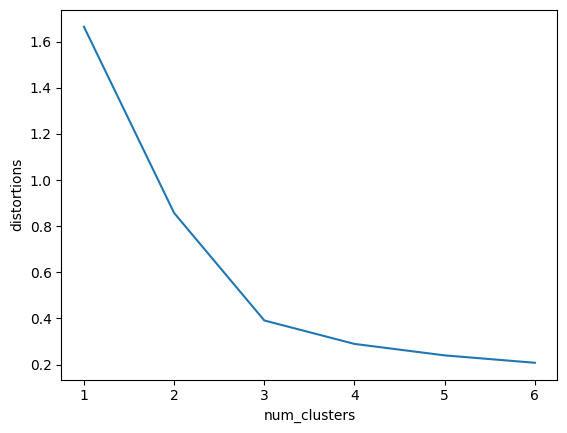

In [50]:
distortions = []
num_clusters = range(1, 7)
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)
# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [51]:
cluster_centers, _ = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']],3)
batman_df['cluster_labels'], _ = vq(batman_df[['scaled_red','scaled_blue','scaled_green']],cluster_centers)
batman_df.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue,cluster_labels
0,37,27,25,0.494520,0.362747,0.291080,0
1,33,22,20,0.441059,0.295572,0.232864,0
2,48,30,28,0.641540,0.403052,0.326010,0
3,47,31,31,0.628174,0.416487,0.360939,0
4,30,24,26,0.400962,0.322442,0.302723,0


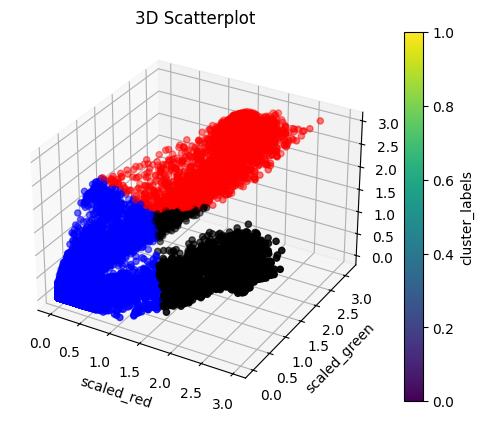

In [52]:
from mpl_toolkits.mplot3d import Axes3D

df = batman_df

# Define your custom color mapping
custom_color_map = {
    0: 'blue',
    1: 'black',
    2: 'red'
}

# Map colors based on cluster_labels column
colors = df['cluster_labels'].map(custom_color_map)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(df['scaled_red'], df['scaled_green'], df['scaled_blue'], c=df['cluster_labels'], cmap='viridis')
scatter = ax.scatter(df['scaled_red'], df['scaled_green'], df['scaled_blue'], c=colors)
ax.set_xlabel('scaled_red')
ax.set_ylabel('scaled_green')
ax.set_zlabel('scaled_blue')
plt.title('3D Scatterplot')
fig.colorbar(scatter, ax=ax, label='cluster_labels')
plt.show()


### Display dominant colors
To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: converted_pixel = standardized_pixel * pixel_std / 255

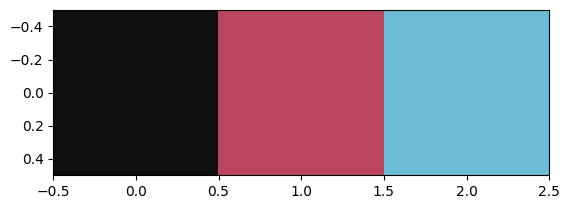

In [53]:
colors = []
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))
# Display colors of cluster centers
plt.imshow([colors])
plt.show()